<a href="https://colab.research.google.com/github/Adichede9085/EDA-DA-21BDS0088/blob/main/21BDS0088.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Link to the raw content of the GitHub file
url = "https://raw.githubusercontent.com/Adichede9085/EDA-DA-21BDS0088/main/Liver%20Data.csv"

# Load the CSV data into a DataFrame
ac_data = pd.read_csv(url)

# Display the first few rows of the data
print(ac_data.head())

   Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3         

In [14]:
# Dimensions
print(f"Number of rows: {ac_data.shape[0]}")
print(f"Number of columns: {ac_data.shape[1]}")

Number of rows: 30691
Number of columns: 11


In [15]:
# Data types and missing values
print("\nData Info:")
print(ac_data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: 

In [16]:
# The result column should be categorical as it has only two values - either 1 or 2.
ac_data.iloc[:, -1] = ac_data.iloc[:, -1].astype('category')
print(ac_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Age of the patient                    30689 non-null  float64 
 1   Gender of the patient                 29789 non-null  object  
 2   Total Bilirubin                       30043 non-null  float64 
 3   Direct Bilirubin                      30130 non-null  float64 
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64 
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64 
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64 
 7   Total Protiens                        30228 non-null  float64 
 8    ALB Albumin                          30197 non-null  float64 
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64 
 10  Result                                30691 non-null  category
dtypes:

<ipython-input-16-28c14e2c3c9e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1
1        1
2        1
3        1
4        1
        ..
30686    1
30687    1
30688    1
30689    1
30690    1
Name: Result, Length: 30691, dtype: category
Categories (2, int64): [1, 2]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ac_data.iloc[:, -1] = ac_data.iloc[:, -1].astype('category')


In [17]:
# Check for missing values
print("\nMissing Values:")
print(ac_data.isnull().sum())


Missing Values:
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [19]:
# Proportion of missing values
prop_missing = ac_data.isna().sum() / len(ac_data)
print("Proportion of missing values in dataset:\n", prop_missing)

Proportion of missing values in dataset:
 Age of the patient                      0.000065
Gender of the patient                   0.029390
Total Bilirubin                         0.021114
Direct Bilirubin                        0.018279
 Alkphos Alkaline Phosphotase           0.025936
 Sgpt Alamine Aminotransferase          0.017530
Sgot Aspartate Aminotransferase         0.015053
Total Protiens                          0.015086
 ALB Albumin                            0.016096
A/G Ratio Albumin and Globulin Ratio    0.018214
Result                                  0.000000
dtype: float64


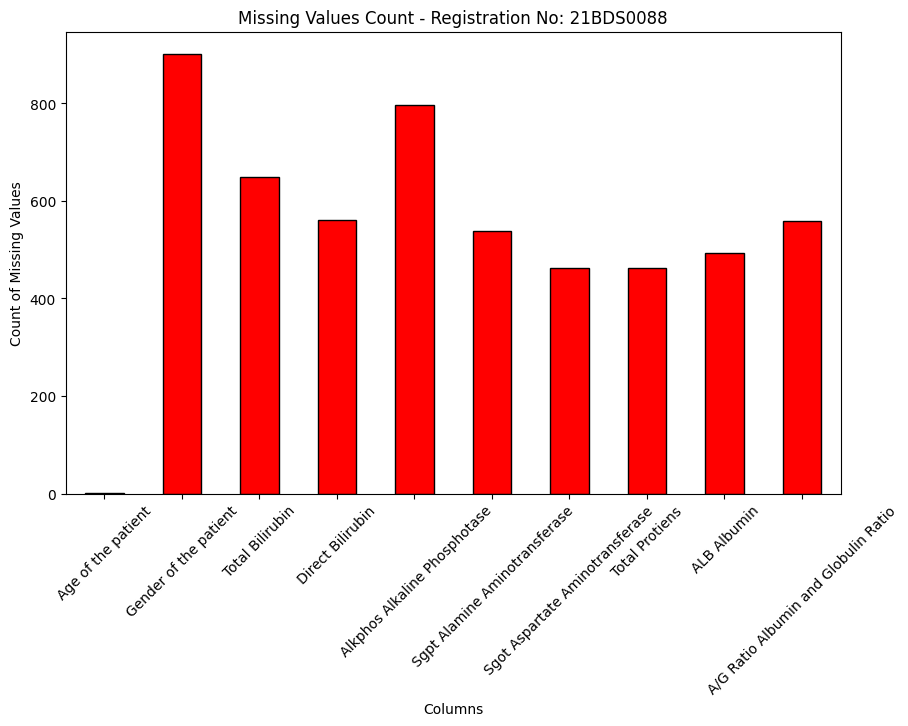

In [24]:
# Missing values visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ac_data.isnull().sum()[ac_data.isnull().sum() > 0].plot(kind='bar', color='red', edgecolor='black')
plt.title("Missing Values Count - Registration No: 21BDS0088")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [10]:
def impute_missing_values(data):
    # Separating numerical and character columns
    numerical_cols = ac_data.select_dtypes(include=['float64', 'int64']).columns
    character_cols = ac_data.select_dtypes(include=['object']).columns

    # Imputing missing values
    ac_data[numerical_cols] = ac_data[numerical_cols].apply(lambda x: x.fillna(x.mean()))  # Mean imputation for numerical columns
    ac_data[character_cols] = ac_data[character_cols].apply(lambda x: x.fillna(x.mode()[0]))  # Mode imputation for categorical columns

    return ac_data

# Applying imputation
data_cleaned = impute_missing_values(ac_data)

# Verifying no missing values remain
print("Missing Values After Imputation:")
print(data_cleaned.isnull().sum())

Missing Values After Imputation:
Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


In [11]:
# Summary statistics
print("\nSummary Statistics:")
print(data_cleaned.describe())


Summary Statistics:
       Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30691.000000     30691.000000      30691.000000   
mean            44.107205         3.370319          1.528042   
std             15.980523         6.189129          2.843243   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.800000          1.400000   
max             90.000000        75.000000         19.700000   

        Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
count                   30691.000000                    30691.000000   
mean                      289.075364                       81.488641   
std                       235.423816                      180.555155   
min                        63.000000                       10.000000   
25%                       176.000000      

In [27]:
# Computing measures of central tendency (Mean, Median, Mode) for numerical columns.
categorical_cols = ['Gender of the patient', 'Result']
numeric_cols = ac_data.columns.difference(categorical_cols)
for col in numeric_cols:
    print(f"\n{col} - Mean: {ac_data[col].mean()}, Median: {ac_data[col].median()}, Mode: {ac_data[col].mode()[0]}")



A/G Ratio Albumin and Globulin Ratio - Mean: 0.9434674100623922, Median: 0.9, Mode: 1.0

Age of the patient - Mean: 44.10720453582717, Median: 45.0, Mode: 45.0

Direct Bilirubin - Mean: 1.5280418187852638, Median: 0.3, Mode: 0.2

Sgot Aspartate Aminotransferase - Mean: 111.46997915908564, Median: 42.0, Mode: 23.0

Total Bilirubin - Mean: 3.370319209133575, Median: 1.0, Mode: 0.8

Total Protiens - Mean: 6.480236866481408, Median: 6.6, Mode: 7.0

 ALB Albumin - Mean: 3.1301420670927573, Median: 3.1, Mode: 3.0

 Alkphos Alkaline Phosphotase - Mean: 289.0753637732062, Median: 209.0, Mode: 215.0

 Sgpt Alamine Aminotransferase - Mean: 81.48864126289259, Median: 35.0, Mode: 25.0


In [28]:
#Compute measures of dispersion (Standard Deviation, Variance) for numerical columns.
for col in numeric_cols:
    print(f"\n{col} - Std Dev: {ac_data[col].std()}, Variance: {ac_data[col].var()}")



A/G Ratio Albumin and Globulin Ratio - Std Dev: 0.32316390844077564, Variance: 0.10443491171871803

Age of the patient - Std Dev: 15.981043352865353, Variance: 255.39374664616187

Direct Bilirubin - Std Dev: 2.8695918384163246, Variance: 8.234557319105582

Sgot Aspartate Aminotransferase - Std Dev: 280.8510782830601, Variance: 78877.32817275754

Total Bilirubin - Std Dev: 6.255522461701278, Variance: 39.13156126884922

Total Protiens - Std Dev: 1.0819804184145247, Variance: 1.17068162583247

 ALB Albumin - Std Dev: 0.7922813804140391, Variance: 0.6277097857507753

 Alkphos Alkaline Phosphotase - Std Dev: 238.53758868111933, Variance: 56900.18121380287

 Sgpt Alamine Aminotransferase - Std Dev: 182.15884969700437, Variance: 33181.846522935826


In [29]:
#Compute quartiles and IQR for numerical columns.
for col in numeric_cols:
    Q1 = ac_data[col].quantile(0.25)
    Q3 = ac_data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"\n{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")



A/G Ratio Albumin and Globulin Ratio - Q1: 0.7, Q3: 1.1, IQR: 0.40000000000000013

Age of the patient - Q1: 32.0, Q3: 55.0, IQR: 23.0

Direct Bilirubin - Q1: 0.2, Q3: 1.3, IQR: 1.1

Sgot Aspartate Aminotransferase - Q1: 26.0, Q3: 88.0, IQR: 62.0

Total Bilirubin - Q1: 0.8, Q3: 2.7, IQR: 1.9000000000000001

Total Protiens - Q1: 5.8, Q3: 7.2, IQR: 1.4000000000000004

 ALB Albumin - Q1: 2.6, Q3: 3.8, IQR: 1.1999999999999997

 Alkphos Alkaline Phosphotase - Q1: 175.0, Q3: 298.0, IQR: 123.0

 Sgpt Alamine Aminotransferase - Q1: 23.0, Q3: 62.0, IQR: 39.0


# **Univariate Analysis**

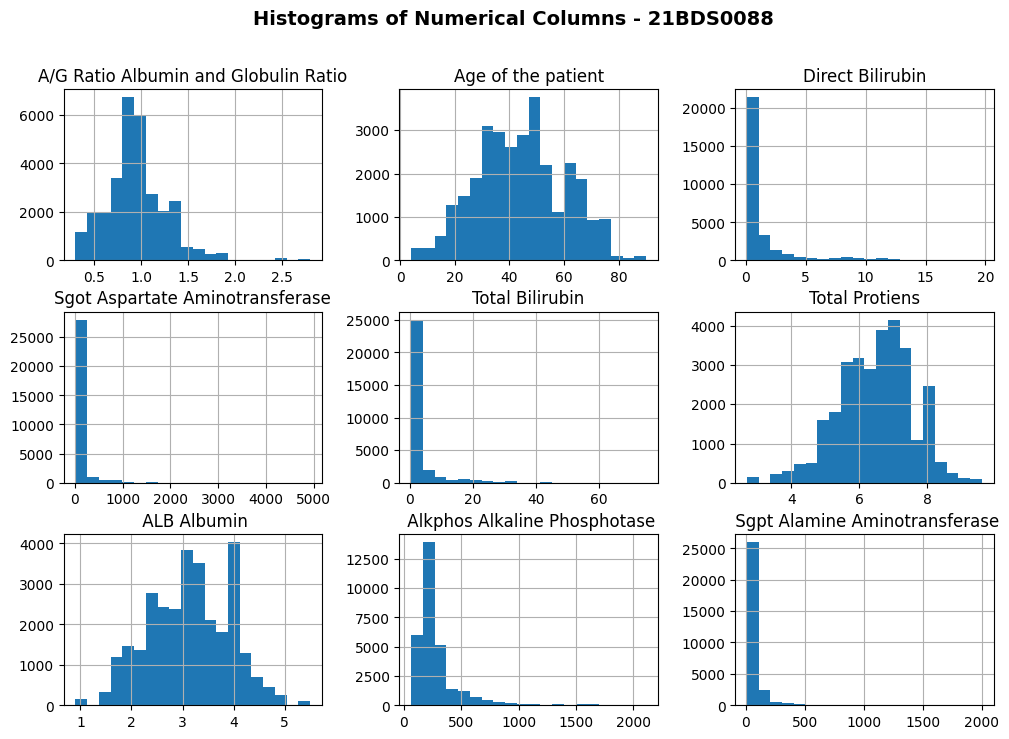

In [33]:
#Plot histograms for all numerical columns.
ac_data[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Columns - 21BDS0088", fontsize=14, fontweight='bold')
plt.show()

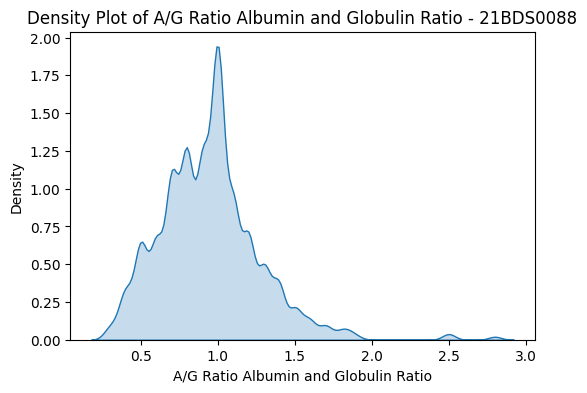

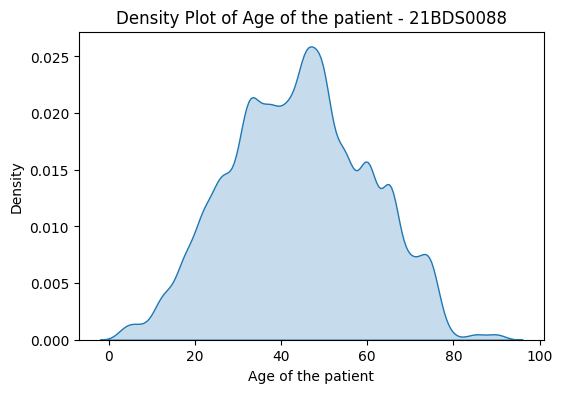

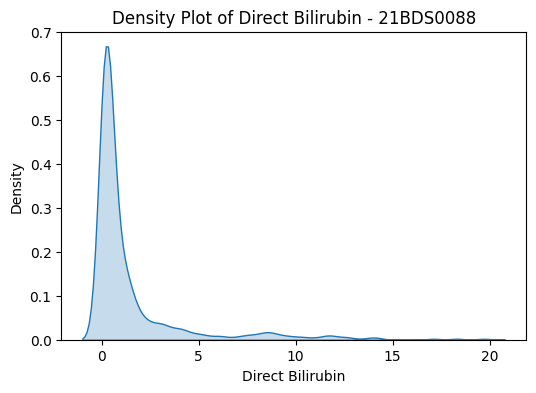

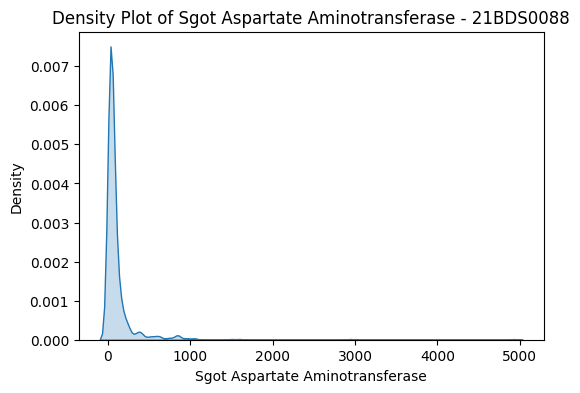

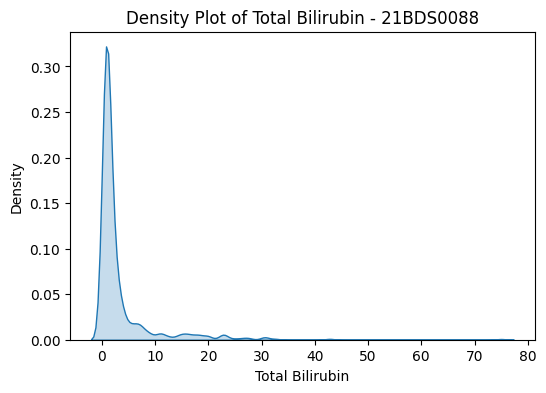

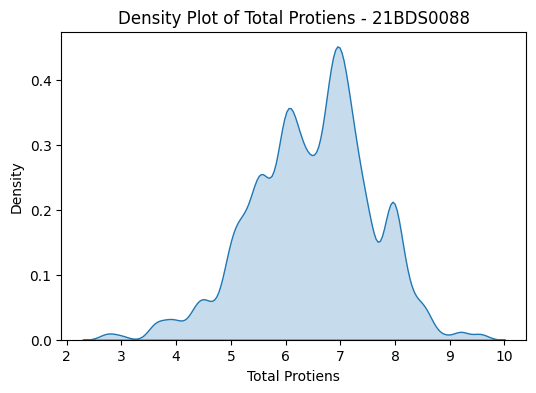

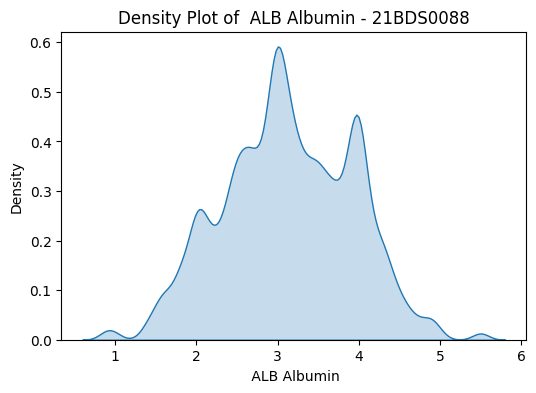

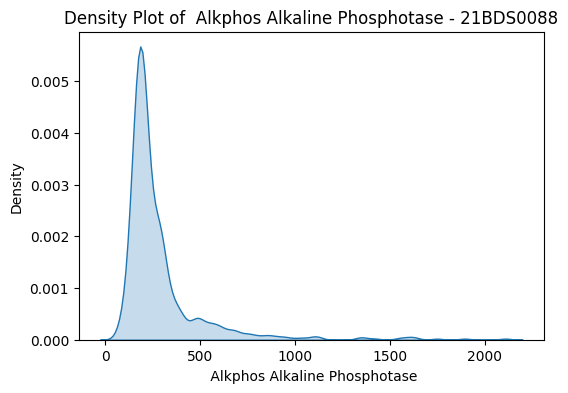

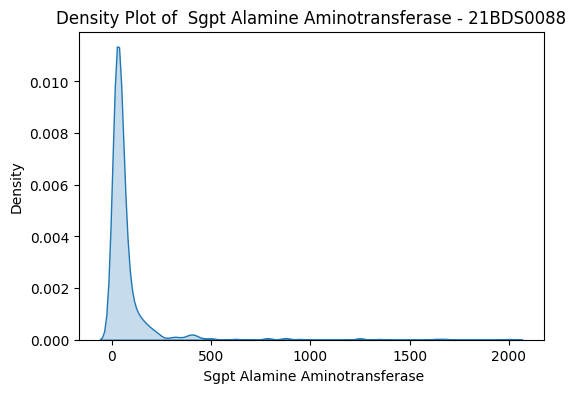

In [36]:
#Plot density plots for all numerical columns.
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(ac_data[col], fill=True)
    plt.title(f"Density Plot of {col} - 21BDS0088")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n")


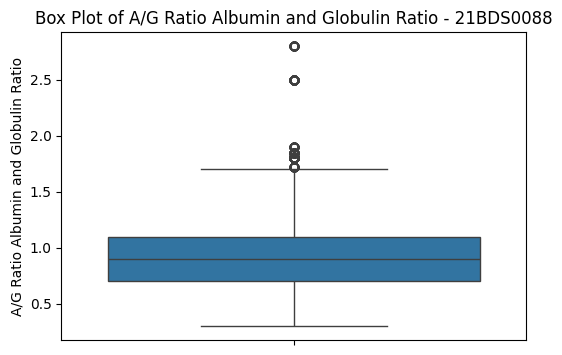

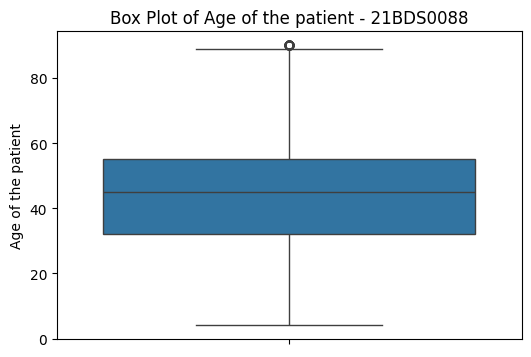

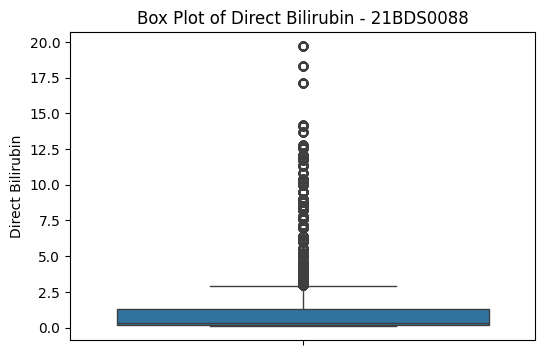

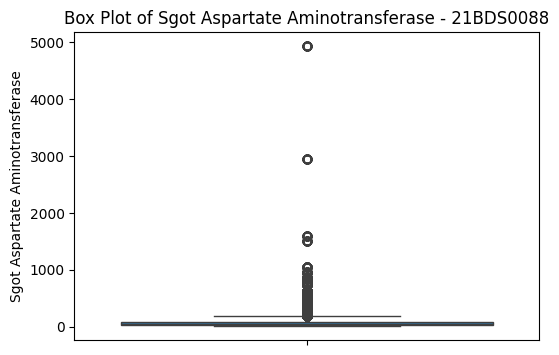

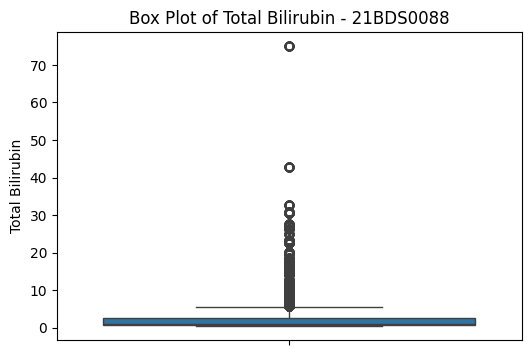

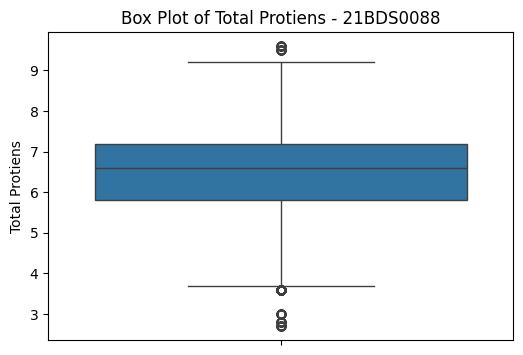

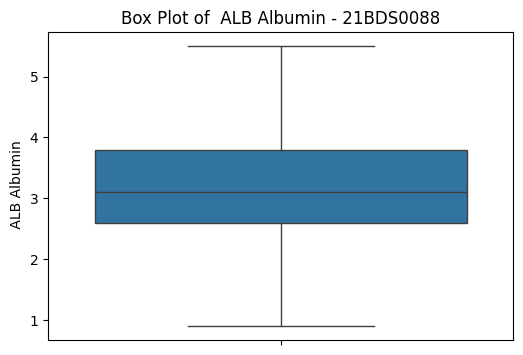

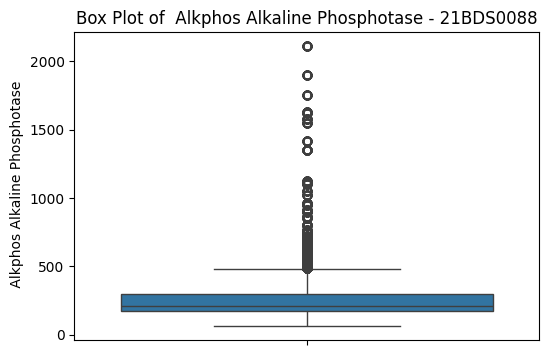

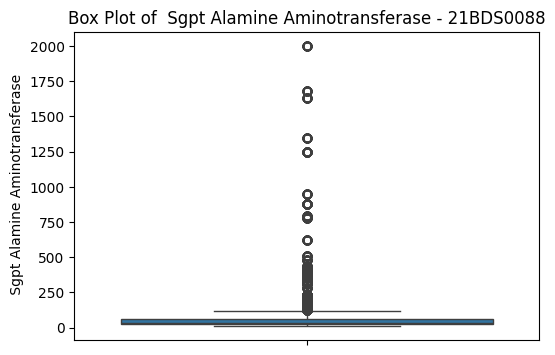

In [37]:
#Plot box plots for all numerical columns.
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ac_data[col])
    plt.title(f"Box Plot of {col} - 21BDS0088")
    plt.show()
    print("\n")


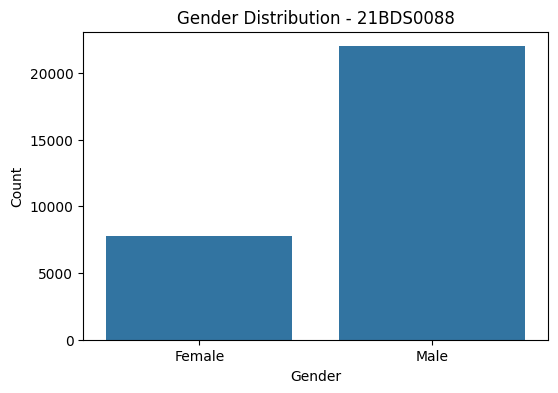

In [38]:
#Display a bar plot for Gender of the patient.
plt.figure(figsize=(6,4))
sns.countplot(x='Gender of the patient', data=ac_data)
plt.title("Gender Distribution - 21BDS0088")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

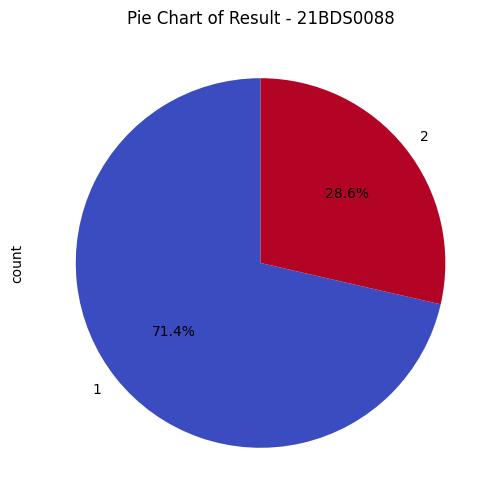

In [39]:
#Display a pie chart for Result.
ac_data['Result'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="coolwarm", figsize=(6,6))
plt.title("Pie Chart of Result - 21BDS0088")
plt.show()

# **Bivariate Analysis**

In [40]:
#Create a contingency table for Gender of the patient vs Result.
contingency_table = pd.crosstab(ac_data['Gender of the patient'], ac_data['Result'])
print("\nContingency Table:\n", contingency_table)


Contingency Table:
 Result                     1     2
Gender of the patient             
Female                  5553  2250
Male                   15742  6244


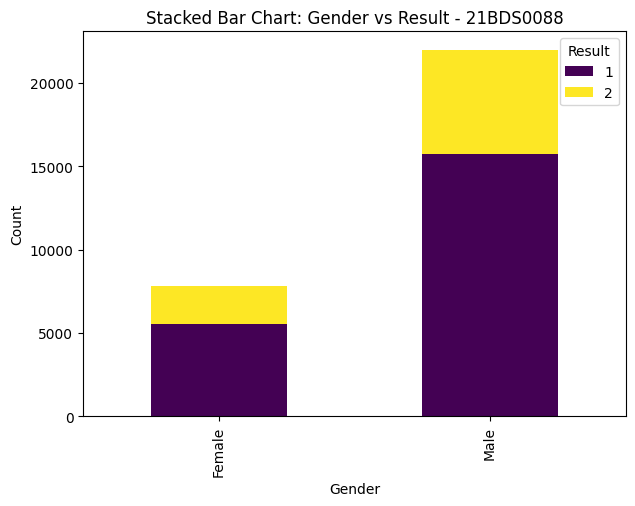

In [41]:
#Display a stacked bar chart for Gender of the patient vs Result.
contingency_table.plot(kind="bar", stacked=True, figsize=(7,5), colormap="viridis")
plt.title("Stacked Bar Chart: Gender vs Result - 21BDS0088")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Result")
plt.show()

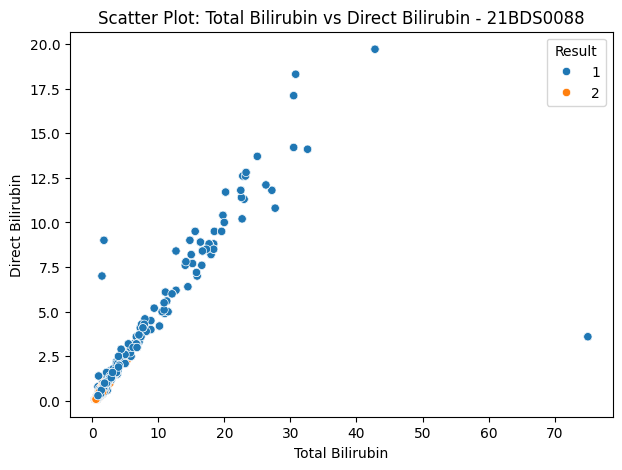

In [42]:
#Display a scatter plot for Total Bilirubin vs Direct Bilirubin.
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total Bilirubin', y='Direct Bilirubin', hue='Result', data=ac_data)
plt.title("Scatter Plot: Total Bilirubin vs Direct Bilirubin - 21BDS0088")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.show()


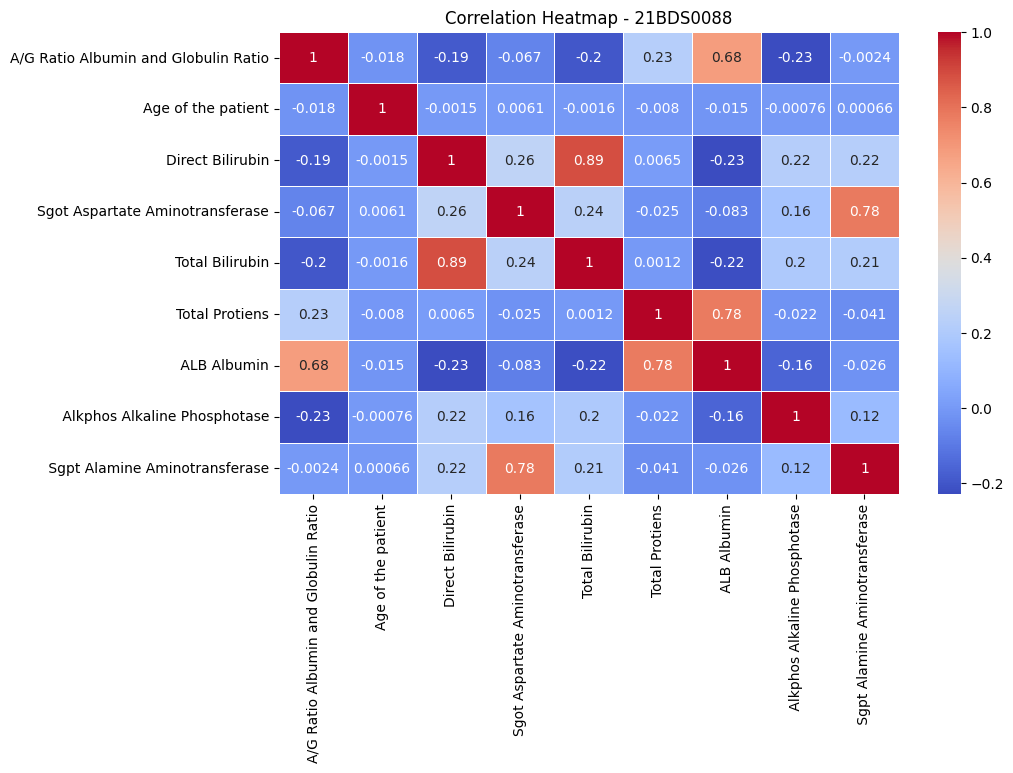

In [43]:
#Display a heatmap of correlations for all numerical variables.
plt.figure(figsize=(10,6))
sns.heatmap(ac_data[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap - 21BDS0088")
plt.show()

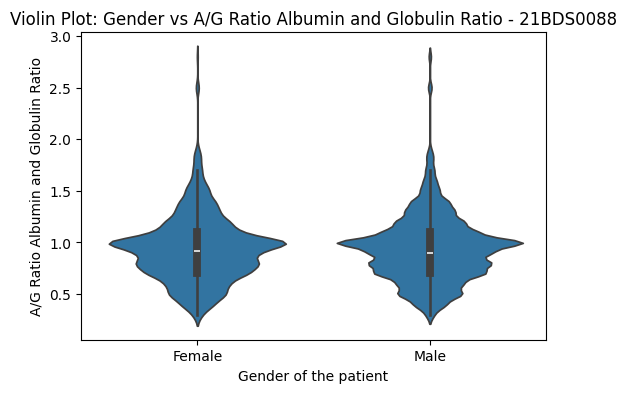

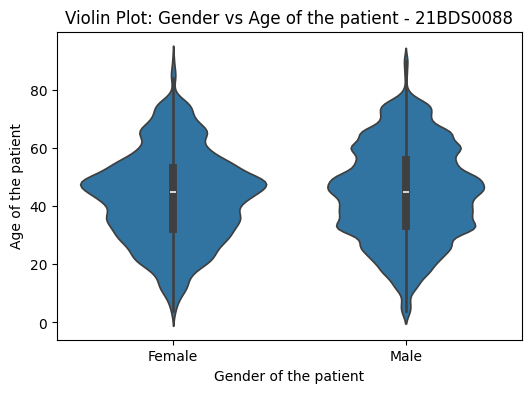

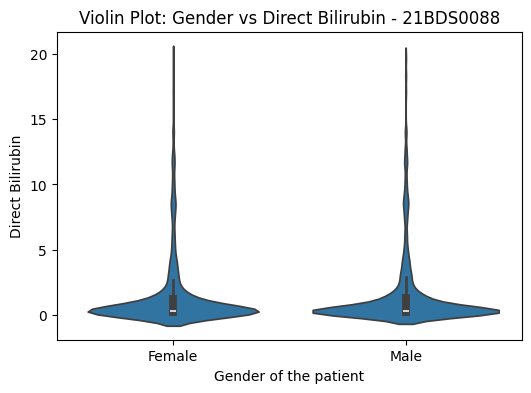

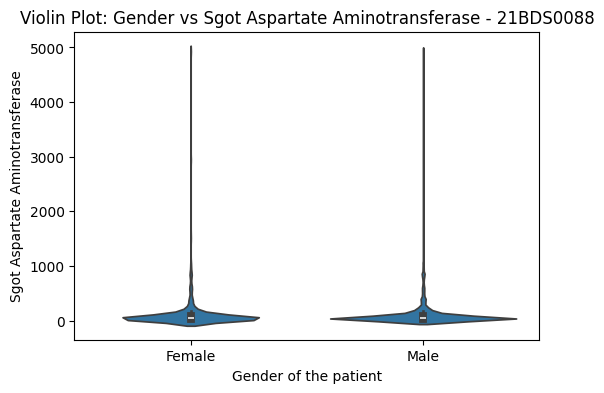

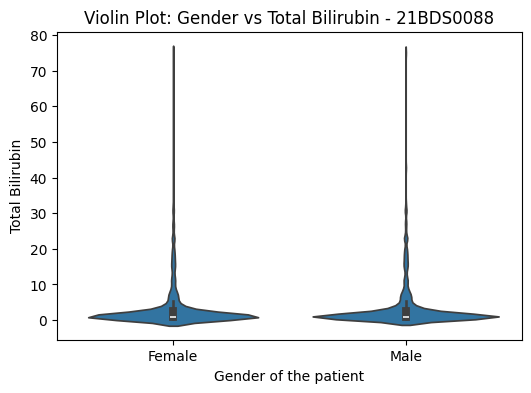

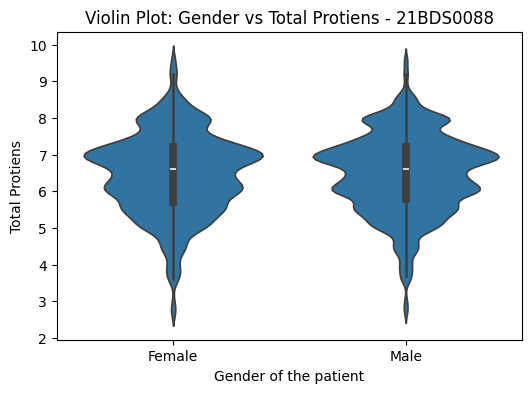

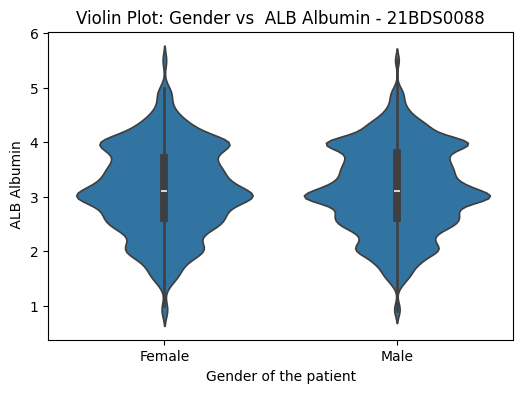

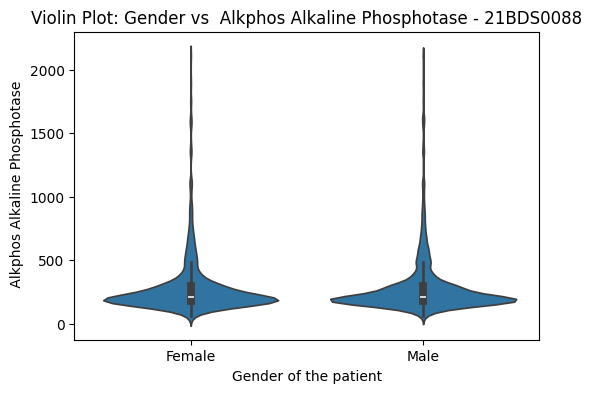

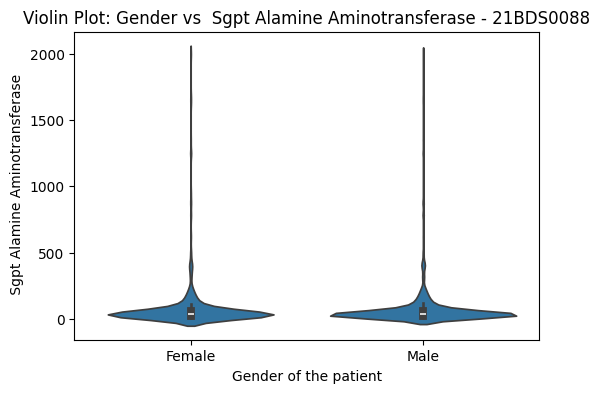

In [49]:
# Violin Plot comparing Gender with all numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Gender of the patient', y=col, data=ac_data)
    plt.title(f"Violin Plot: Gender vs {col} - 21BDS0088")
    plt.show()
    print("\n")

# **Multivariate Analysis**

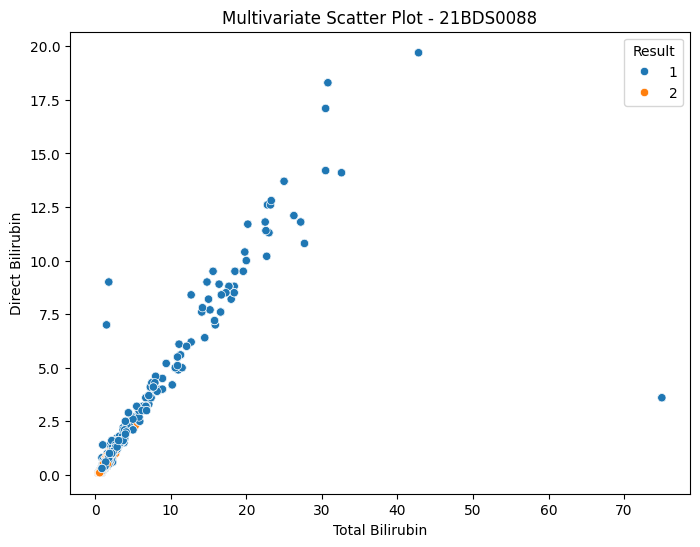

In [45]:
#Display a scatter plot using Total Bilirubin vs Direct Bilirubin, colored by Result.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Bilirubin', y='Direct Bilirubin', hue='Result', data=ac_data)
plt.title("Multivariate Scatter Plot - 21BDS0088")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.show()

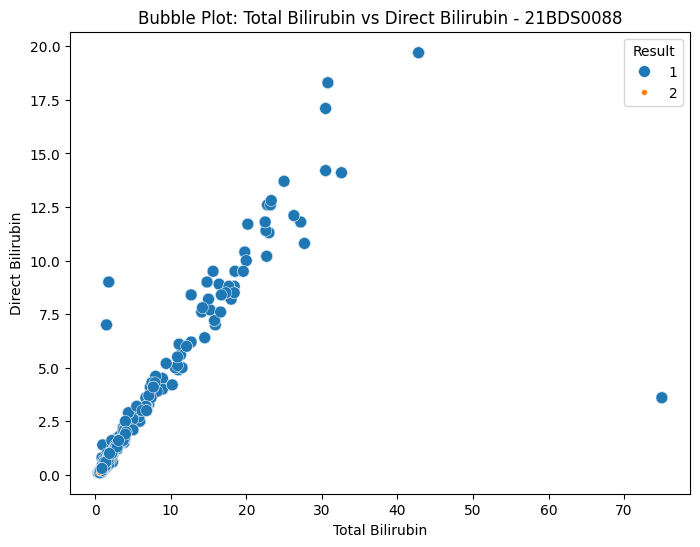

In [46]:
#Display a bubble plot using Total Bilirubin, Direct Bilirubin, and Result as size.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Bilirubin', y='Direct Bilirubin', hue='Result', size='Result', data=ac_data)
plt.title("Bubble Plot: Total Bilirubin vs Direct Bilirubin - 21BDS0088")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.show()

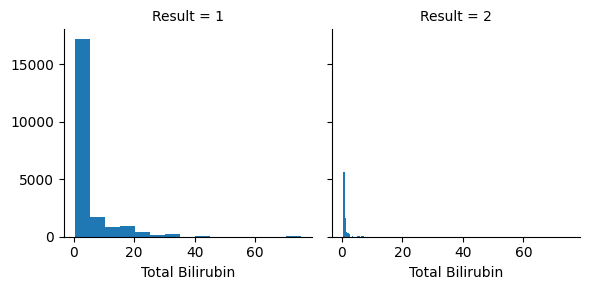

In [47]:
#Display multiple histograms using FacetGrid for Result classification.
g = sns.FacetGrid(ac_data, col="Result")
g.map(plt.hist, "Total Bilirubin", bins=15)
plt.show()


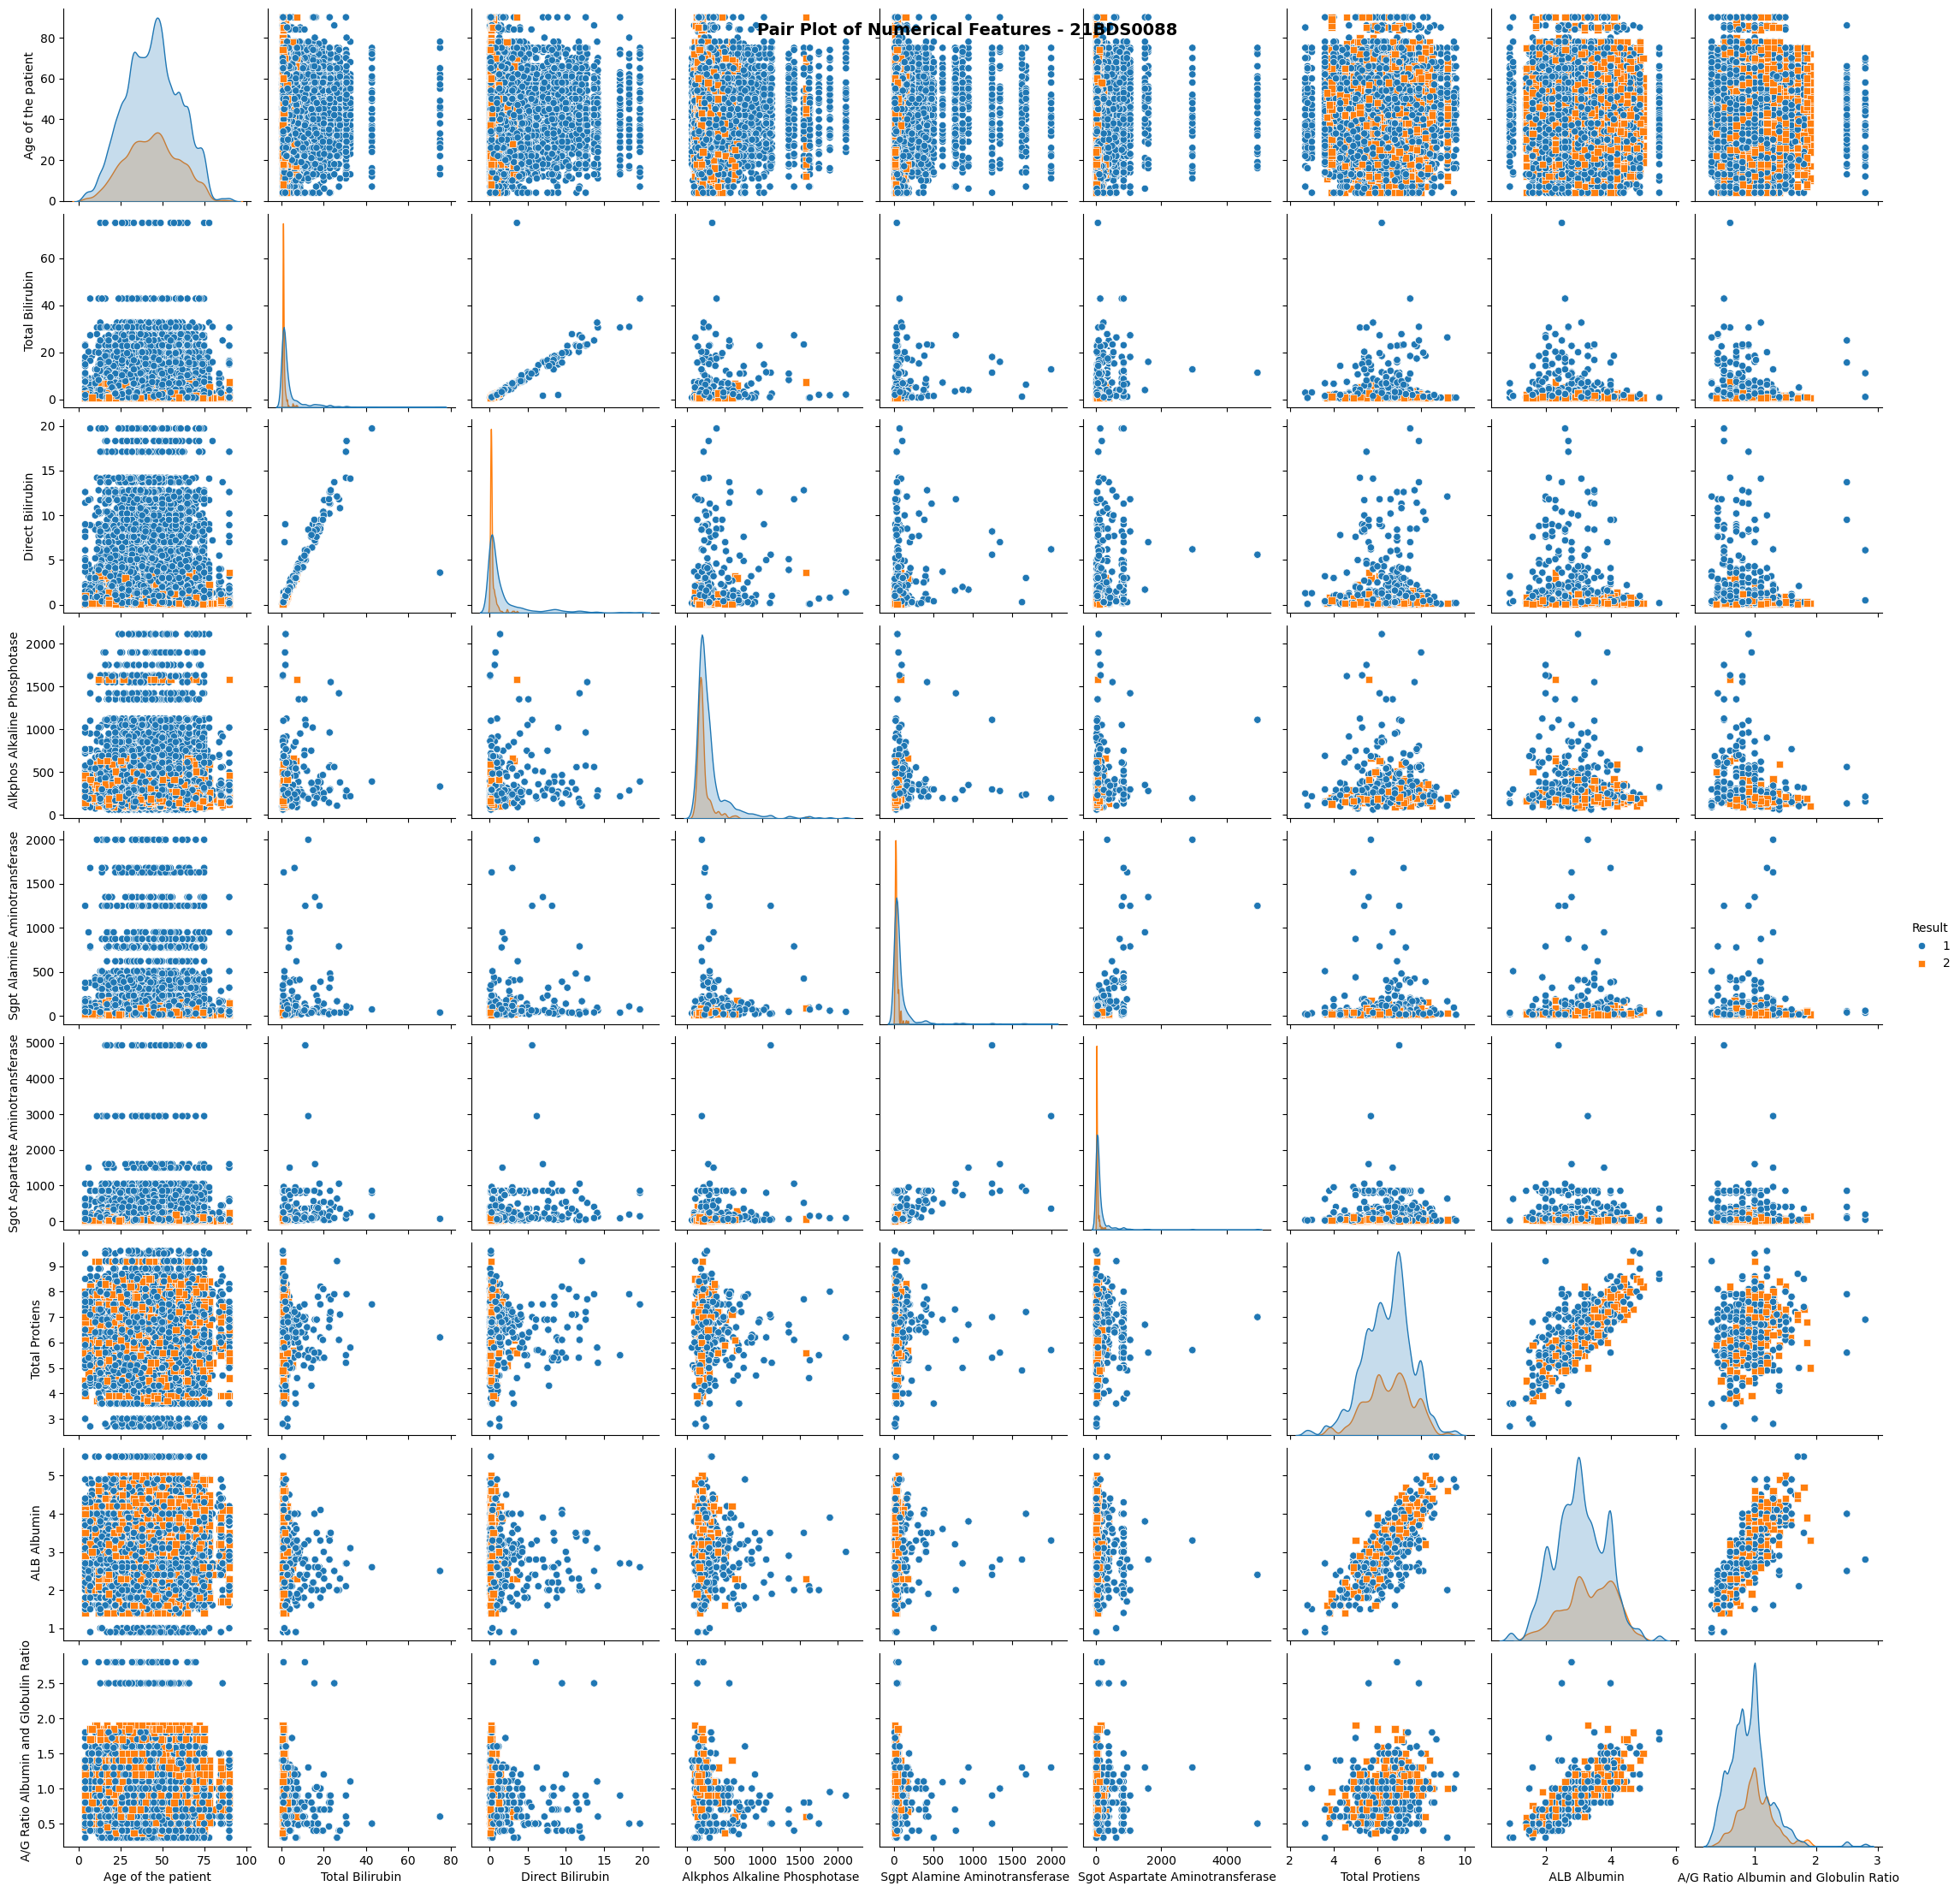

In [53]:
#Display a pair plot to visualize pairwise relationships between numerical columns.
sns.pairplot(ac_data, hue="Result", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Pair Plot of Numerical Features - 21BDS0088 \n", fontsize=14, fontweight='bold')
plt.show()

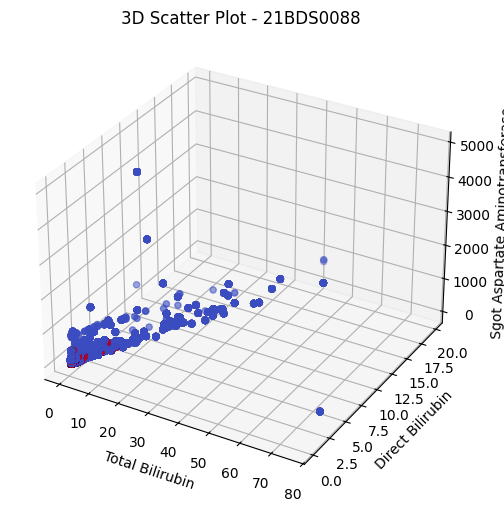

In [54]:
#Generate a 3D scatter plot for Total Bilirubin, Direct Bilirubin, and Sgot Aspartate Aminotransferase
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ac_data['Total Bilirubin'], ac_data['Direct Bilirubin'], ac_data['Sgot Aspartate Aminotransferase'], c=ac_data['Result'], cmap='coolwarm')

ax.set_xlabel('Total Bilirubin')
ax.set_ylabel('Direct Bilirubin')
ax.set_zlabel('Sgot Aspartate Aminotransferase')
ax.set_title("3D Scatter Plot - 21BDS0088")

plt.show()

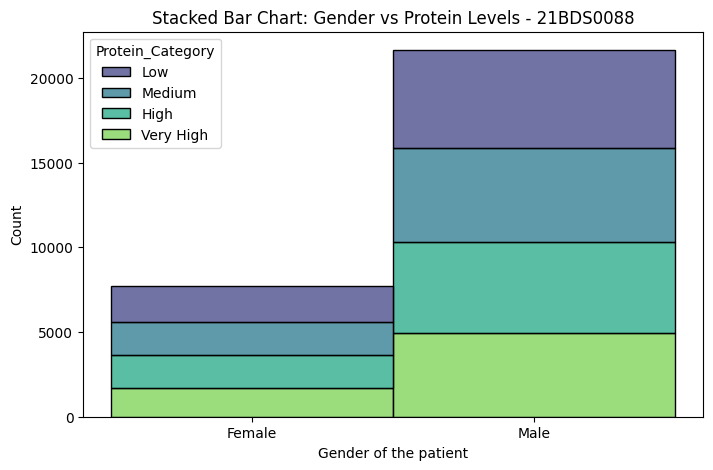

In [55]:
#Generate a stacked bar plot for Gender of the patient vs Result, with different colors for Total Protiens ranges.
ac_data['Protein_Category'] = pd.qcut(ac_data['Total Protiens'], q=4, labels=["Low", "Medium", "High", "Very High"])

plt.figure(figsize=(8,5))
sns.histplot(data=ac_data, x='Gender of the patient', hue='Protein_Category', multiple="stack", palette="viridis")
plt.title("Stacked Bar Chart: Gender vs Protein Levels - 21BDS0088")
plt.show()

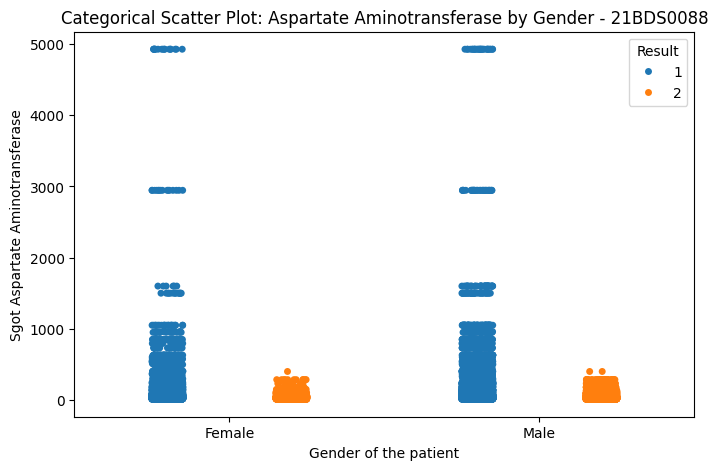

In [56]:
#Create a categorical scatter plot (stripplot) for Sgot Aspartate Aminotransferase, grouped by Gender of the patient, with Result as hue.
plt.figure(figsize=(8,5))
sns.stripplot(x='Gender of the patient', y='Sgot Aspartate Aminotransferase', hue="Result", data=ac_data, jitter=True, dodge=True)
plt.title("Categorical Scatter Plot: Aspartate Aminotransferase by Gender - 21BDS0088")
plt.show()